# Julia Set Generator with Timing Measurements

This code generates and visualizes a Julia Set fractal using Python and matplotlib. Let's break down its key components:

The program starts by defining the complex plane boundaries (x1, x2, y1, y2) from -1.8 to 1.8 and sets a specific complex constant (c_real, c_imag) that defines the particular Julia Set we want to visualize.

In [1]:
import time
from functools import wraps
import numpy as np
import matplotlib.pyplot as plt

# Area of complex space to investigate
x1, x2, y1, y2 = -1.8, 1.8, -1.8, 1.8
c_real, c_imag = -0.62772, -0.42193

def timefn(fn):
    @wraps(fn)
    def measure_time(*args, **kwargs):
        t1 = time.time()
        result = fn(*args, **kwargs)
        t2 = time.time()
        print(f"@timefn: {fn.__name__} took {(t2 - t1):0.2f} seconds")
        return result
    return measure_time

In [2]:
@timefn
def calculate_z_serial_purepython(maxiter, zs, cs):
    """Calculate output list using Julia update rule"""
    output = [0] * len(zs)
    for i in range(len(zs)):
        n = 0
        z = zs[i]
        c = cs[i]
        while abs(z) < 2 and n < maxiter:
            z = z * z + c
            n += 1
        output[i] = n
    return output

In [3]:
def calc_pure_python(desired_width, max_iterations):
    """Create a list of complex coordinates (zs) and complex parameters (cs),
    build and visualize Julia set"""
    # Calculate step sizes for x and y coordinates
    x_step = (x2 - x1) / desired_width
    y_step = (y1 - y2) / desired_width
    
    # Initialize empty lists for coordinates
    x = []
    y = []
    
    # Generate y coordinates from y2 to y1
    ycoord = y2
    while ycoord > y1:
        y.append(ycoord)
        ycoord += y_step
    
    # Generate x coordinates from x1 to x2
    xcoord = x1
    while xcoord < x2:
        x.append(xcoord)
        xcoord += x_step
    
    # Create lists for complex coordinates and parameters
    zs = []
    cs = []
    for ycoord in y:
        for xcoord in x:
            zs.append(complex(xcoord, ycoord))
            cs.append(complex(c_real, c_imag))
    
    print("Length of x:", len(x))
    print("Total elements:", len(zs))
    
    # Time the calculation
    start_time = time.time()
    output = calculate_z_serial_purepython(max_iterations, zs, cs)
    end_time = time.time()
    secs = end_time - start_time
    print(f"{calculate_z_serial_purepython.__name__} took {secs:0.2f} seconds")
    
    # Reshape output for visualization
    output_array = np.array(output).reshape(desired_width, desired_width)
    
    # Create visualization
    plt.figure(figsize=(10, 10))
    plt.imshow(output_array, cmap='hot', extent=[x1, x2, y1, y2])
    plt.colorbar(label='Iterations')
    plt.title('Julia Set')
    plt.xlabel('Re(z)')
    plt.ylabel('Im(z)')
    plt.show()

Length of x: 1000
Total elements: 1000000
@timefn: calculate_z_serial_purepython took 3.65 seconds
calculate_z_serial_purepython took 3.65 seconds


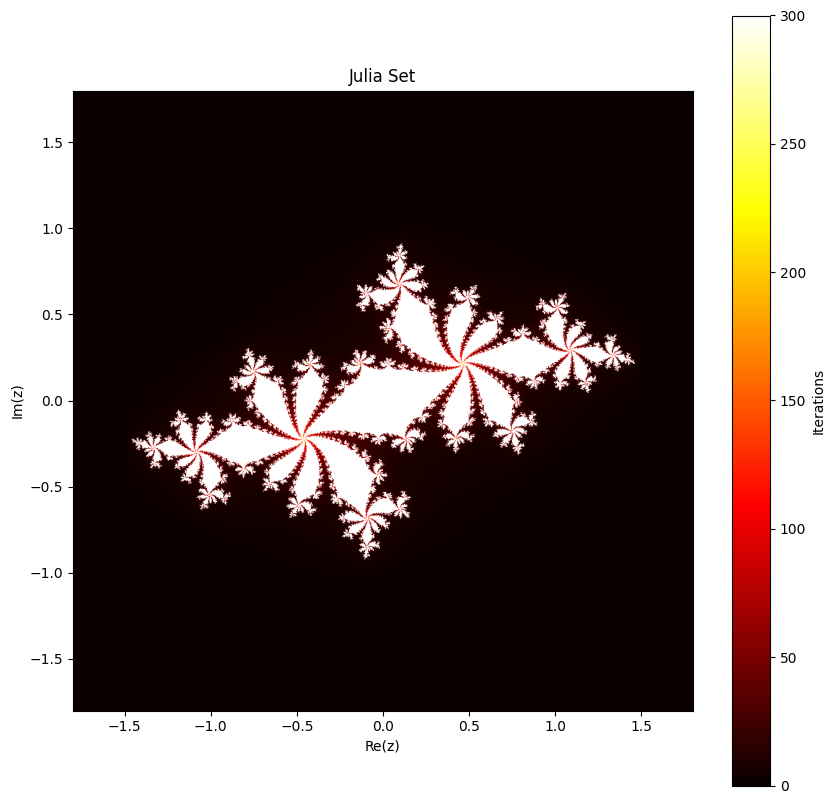

In [4]:
calc_pure_python(desired_width=1000, max_iterations=300)